<a href="https://colab.research.google.com/github/igorvojnyak/datavojnyak.github.io/blob/master/PREDICTING%20A%20PULSAR%20STAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
#from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import scipy.stats as st
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from datetime import date, timedelta
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt   
import seaborn as sns   
rcParams['figure.figsize'] = 16, 8

In [2]:
data = pd.read_csv("/content/pulsar_stars.csv")
print (data.head())

    Mean of the integrated profile  ...  target_class
0                       140.562500  ...             0
1                       102.507812  ...             0
2                       103.015625  ...             0
3                       136.750000  ...             0
4                        88.726562  ...             0

[5 rows x 9 columns]


In [3]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [0]:
#finding missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values %.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
missing_values_table(data).head(20)

Your selected dataframe has 9 columns.
There are 0 columns that have missing values %.


,Missing Values,% of Total Values


In [0]:
data_corr = (data.drop(columns='target_class')).replace(0, np.NaN).corr()

In [8]:
data_corr.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve',
       ' Skewness of the DM-SNR curve'],
      dtype='object')

In [9]:
data_corr.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
Mean of the integrated profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033
Standard deviation of the integrated profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691
Excess kurtosis of the integrated profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491
Skewness of the integrated profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782
Mean of the DM-SNR curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269


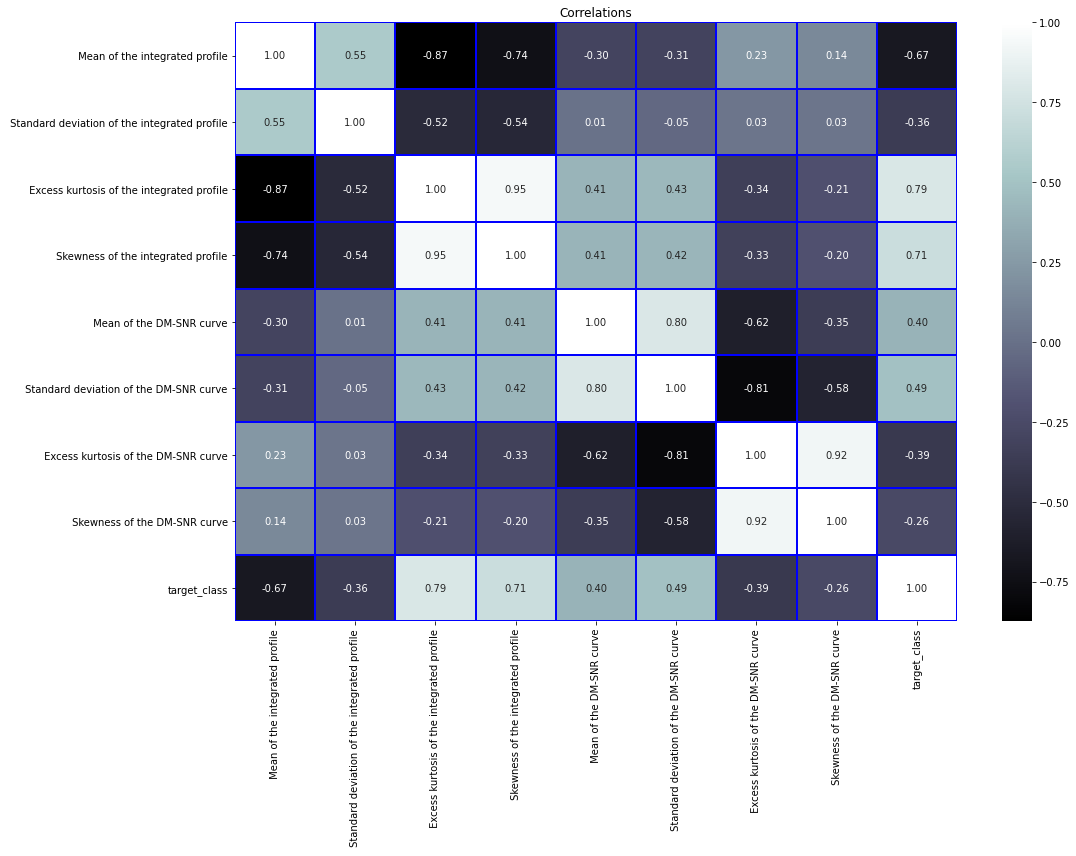

In [10]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,cmap="bone",linewidths=1,fmt=".2f",linecolor="blue")
plt.title("Correlations")
plt.tight_layout()
plt.show()

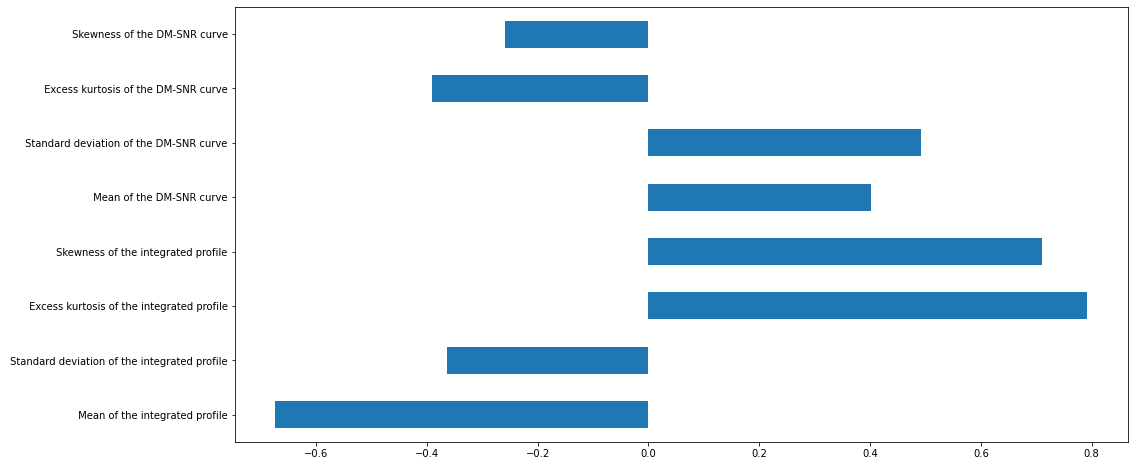

In [11]:
variation = data.drop(['target_class'],axis=1).corrwith(data.target_class)

variation.plot.barh(stacked=True)

In [12]:
data.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

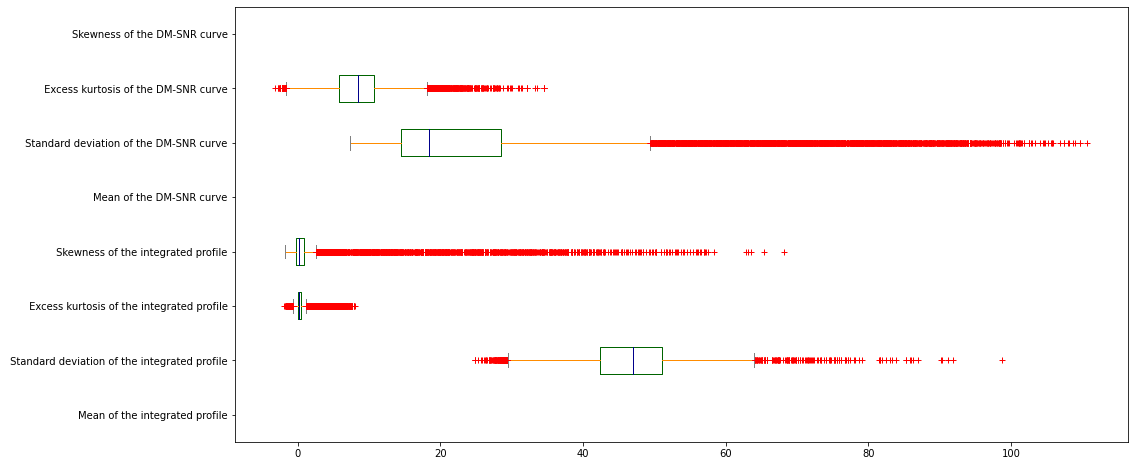

In [13]:
#Exploratory Data Analysis,distribution,finding Outliers
BoX_plots = pd.DataFrame(data, columns=['Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve'])
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}
BoX_plots.plot.box(color=color, sym='r+',vert=False)


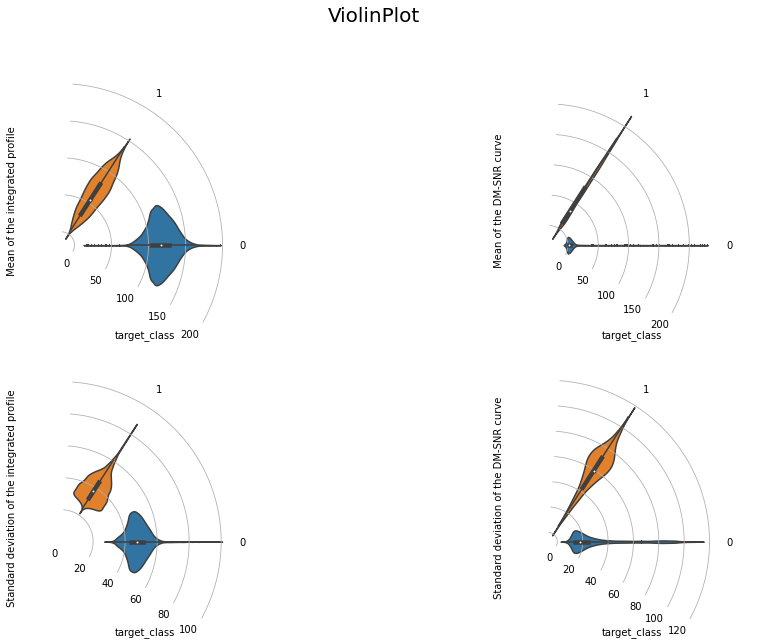

In [14]:
plt.figure(figsize=(16,10))
plt.subplot(221,frameon=False,projection='polar')
sns.violinplot(data=data, y=" Mean of the integrated profile", x="target_class")

plt.subplot(2,2,2,frameon=False,projection='polar')
sns.violinplot(data=data,y=" Mean of the DM-SNR curve",x="target_class")

plt.subplot(2,2,3,frameon=False,projection='polar')
sns.violinplot(data=data,y=" Standard deviation of the integrated profile",x="target_class")

plt.subplot(2,2,4,frameon=False,projection='polar')
sns.violinplot(data=data,y=" Standard deviation of the DM-SNR curve",x="target_class")


plt.suptitle("ViolinPlot",fontsize=20)

plt.show()


In [0]:
target = pd.DataFrame(data['target_class']).values
train_features = (data.drop(["target_class"], axis=1)).values

In [0]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_f = scaler.fit_transform(train_features)

In [0]:
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(scaled_f, target, test_size=0.2, random_state=1)

In [19]:
print(train_X.shape)
print(val_X.shape)
print(train_y.shape)
print(val_y.shape)

(14318, 8)
(3580, 8)
(14318, 1)
(3580, 1)


In [20]:
# Make sure all values are finite
print(np.where(~np.isfinite(train_X)))
print(np.where(~np.isfinite(val_X)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [26]:
clf1 = LogisticRegression(penalty='l1',random_state=42,solver="liblinear", C=1.6)
clf2 = DecisionTreeClassifier(random_state=42, criterion='entropy',max_depth=1)
clf3 = KNeighborsClassifier(n_neighbors=7, weights="distance", metric='minkowski', p=2)
clf4 = RandomForestClassifier(n_estimators=37, random_state=42, max_leaf_nodes=200,criterion="entropy")
clf5 = SVC(random_state=42, C=250, gamma=1.6, kernel="poly", probability=True)
clf6 = VotingClassifier(estimators=[('LogisticRegression',clf1),('DecisionTreeClassifier',clf2),('KNeighborsClassifier',clf3),('RandomForestClassifier',clf4),('SVC', clf5)],voting='soft')
pipe1 = Pipeline([['scaler', MinMaxScaler(feature_range=(0,1))],
                 ['clf', clf1]])
pipe3 = Pipeline([['scaler', MinMaxScaler(feature_range=(0,1))],
                 ['clf', clf3]])
pipe4 = Pipeline([['scaler', MinMaxScaler(feature_range=(0,1))],
                 ['clf', clf4]])
pipe5 = Pipeline([['scaler', MinMaxScaler(feature_range=(0,1))],
                 ['clf', clf5]])
pipe6 = Pipeline([['clf', clf6]])
clf_labels = ['LogisticRegression','DecisionTreeClassifier','kNeighborsClassifier','RandomForestClassifier','SVM','VotingClassifier']
print('10-k verification:\n')
for clf, label in zip([pipe1, clf2, pipe3, pipe4, pipe5, pipe6], clf_labels):
    scores = cross_val_score(estimator=clf,
                         X=train_X,
                         y=train_y,
                         cv=10,
                         scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


10-k verification:

ROC AUC: 0.98 (+/- 0.01) [LogisticRegression]
ROC AUC: 0.91 (+/- 0.02) [DecisionTreeClassifier]
ROC AUC: 0.95 (+/- 0.01) [kNeighborsClassifier]
ROC AUC: 0.97 (+/- 0.01) [RandomForestClassifier]
ROC AUC: 0.98 (+/- 0.01) [SVM]
ROC AUC: 0.98 (+/- 0.01) [VotingClassifier]


In [0]:
all_clf = [pipe1,pipe4, pipe5, pipe6]

clf_labels = ['LogisticRegression','RandomForestClassifier','SVM','MajorityClassifier']

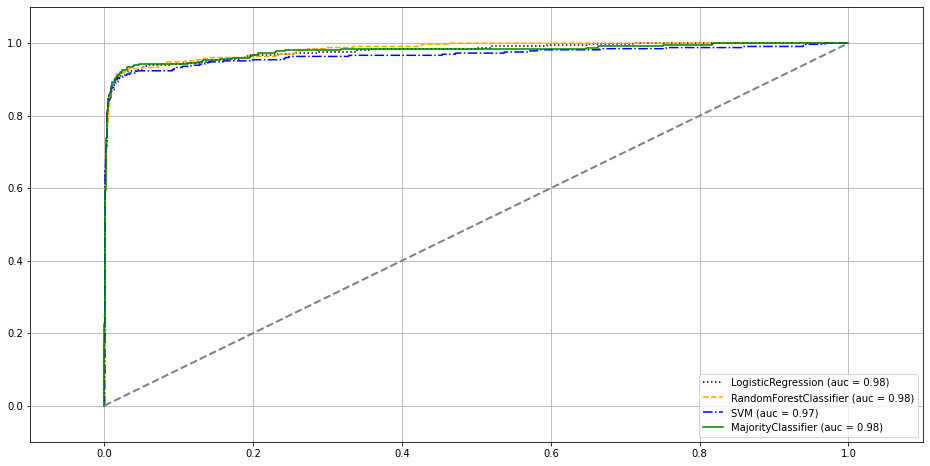

In [38]:
colors = ['black','orange','blue','green']
linestyles = [':','--','-.','-','_']
for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
  y_pred = clf.fit(train_X,
                   train_y).predict_proba(val_X)[:,1]
  fpr, tpr, thresholds = roc_curve(y_true=val_y,
                                   y_score=y_pred)
  roc_auc = auc(x=fpr, y=tpr)
  plt.plot(fpr, tpr,
           color=clr,
           linestyle=ls,
           label='%s (auc = %0.2f)' % (label, roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1]) 
plt.grid()
plt.show()                                    